# Canonical Genetic Algorithm

In [1]:
# genetic algorithm search for continuous function optimization
from numpy.random import randint
from numpy.random import rand
import numpy as np

import matplotlib.pyplot as plt
from numpy.core.fromnumeric import mean

Objective Function

In [2]:
# objective function
def objective(x):
	return (x[1]-x[0])**4.0 + 12*np.dot(x[0],x[1])- x[0] + x[1] -3

Decoding

In [3]:
# decode bitstring to numbers
def decode(bounds, n_bits, bitstring):
	decoded = list()
	largest = 2**n_bits
	for i in range(len(bounds)):
		# extract the substring
		start, end = i * n_bits, (i * n_bits)+n_bits
		substring = bitstring[start:end]
		# convert bitstring to a string of chars
		chars = ''.join([str(s) for s in substring])
		integer = int(chars, 2)
		# scale integer to the range
		value = bounds[i][0] + (integer/largest) * (bounds[i][1] - bounds[i][0])
		decoded.append(value)
	return decoded

Selection

In [4]:
def selection(pop, scores, k=3):
	# first random selection
	selection_i = randint(len(pop))
	for i in randint(0, len(pop), k-1):
		# check if better (e.g. perform a tournament)
		if scores[i] < scores[selection_i]:
			selection_i = i
	return pop[selection_i]
 

Crossover

In [5]:
def crossover(p1, p2, r_cross):
	# children are copies of parents by default
	c1, c2 = p1.copy(), p2.copy()
	# check for recombination
	if rand() < r_cross:
		pt = randint(1, len(p1)-2)
		# perform crossover
		c1 = p1[:pt] + p2[pt:]
		c2 = p2[:pt] + p1[pt:]
	return [c1, c2]

Mutation

In [6]:
def mutation(bitstring, r_mut):
	for i in range(len(bitstring)):
		if rand() < r_mut:
			bitstring[i] = 1 - bitstring[i]
	return bitstring

In [24]:
B=[]
A=[]
W=[]

# genetic algorithm
def genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut):
	# initial population of random bitstring
	pop = [randint(0, 2, n_bits*len(bounds)).tolist() for _ in range(n_pop)]

	# keep track of best solution
	best, best_eval = 0, objective(decode(bounds, n_bits, pop[0]))
	
	for gen in range(n_iter):

		# decode population
		decoded = [decode(bounds, n_bits, p) for p in pop]
		
		# evaluate all candidates in the population
		scores = [objective(d) for d in decoded]

		W.append(max(scores))
		A.append(mean(scores))
		B.append(min(scores))

		for i in range(n_pop):
			if scores[i] < best_eval:
				best, best_eval = pop[i], scores[i]
				#B.append(best_eval)
				#print(pop)
				#print(scores)
				#print('\n')
			
		# select parents
		selected = [selection(pop, scores) for _ in range(n_pop)]
		# create the next generation
		children = list()
		for i in range(0, n_pop, 2):
			# get selected parents in pairs
			p1, p2 = selected[i], selected[i+1]
			# crossover and mutation
			for c in crossover(p1, p2, r_cross):
				# mutation
				c=mutation(c, r_mut)
				# Update population
				pop = c    #children

		return best, best_eval    

In [25]:
# define range for inputs - x1 and x2
bounds = [[-1.0, 1.0], [-1.0, 1.0]]

# total iterations
n_iter = 50

n_bits = 16

n_pop = 50

r_cross = 0.9

r_mut = 1.0 / (float(n_bits) * len(bounds))

In [26]:
for i in range(n_iter):
  print("Iteration =",i)
  best, score= genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)

  decoded = decode(bounds, n_bits, best)
  print(decoded)
  
  print('f(%s) = %f' % (decoded, score))

Iteration = 0
[0.57025146484375, -0.802154541015625]
f([0.57025146484375, -0.802154541015625]) = -6.313998
Iteration = 1
[0.637176513671875, -0.615386962890625]
f([0.637176513671875, -0.615386962890625]) = -6.496390
Iteration = 2
[0.801483154296875, -0.66796875]
f([0.801483154296875, -0.66796875]) = -6.231312
Iteration = 3
[0.5970458984375, -0.79376220703125]
f([0.5970458984375, -0.79376220703125]) = -6.336059
Iteration = 4
[0.774810791015625, -0.70050048828125]
f([0.774810791015625, -0.70050048828125]) = -6.251034
Iteration = 5
[0.779296875, -0.57440185546875]
f([0.779296875, -0.57440185546875]) = -6.367196
Iteration = 6
[0.59051513671875, -0.754974365234375]
f([0.59051513671875, -0.754974365234375]) = -6.418037
Iteration = 7
[0.5496826171875, -0.71563720703125]
f([0.5496826171875, -0.71563720703125]) = -6.422489
Iteration = 8
[0.648101806640625, -0.7850341796875]
f([0.648101806640625, -0.7850341796875]) = -6.320103
Iteration = 9
[0.483062744140625, -0.6864013671875]
f([0.483062744140

# Plot for Best Objective Function values

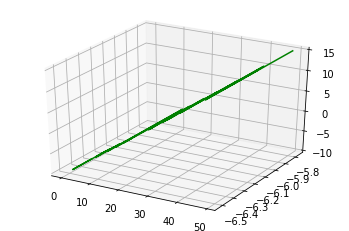

In [27]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(-10, 15, len(A))
xline = [i for i in range(len(A))]
yline = B
ax.plot3D(xline, yline, zline, 'Green')

# Plot for Average Objective Function values

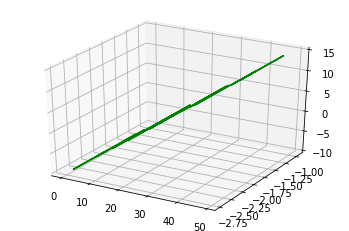

In [28]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(-10, 15, len(A))
xline = [i for i in range(len(A))]
yline_a = A
ax.plot3D(xline, yline_a, zline, 'Green')

# Plot for Worst Objective Function values

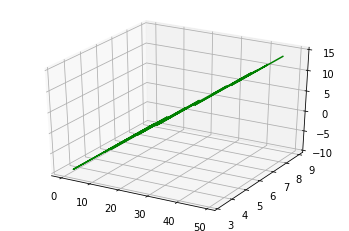

In [29]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(-10, 15, len(A))
xline = [i for i in range(len(A))]
yline_w = W
ax.plot3D(xline, yline_w, zline, 'Green')